<a href="https://colab.research.google.com/github/mwiewiorko/quantFinance/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Sampling and plotting


In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


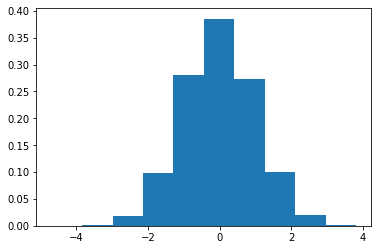

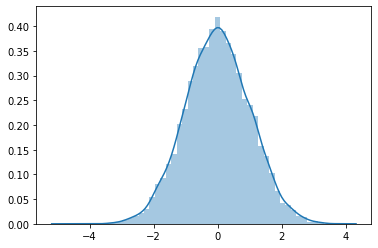

In [10]:
a = np.random.normal(0,1,size=10000)
#bins, counts = plt.hist(a)
# plt.hist(a)
# plt.hist(a + 10)
# plt.show()

# for i in range(3):
#   plt.hist(a + i)
#   plt.show()


plt.hist(a,density=True)
plt.show()
sns.distplot(a);

## **Task**

Sample 1000 random variables from Beta($\alpha=5$, $\beta = 1$). Using *plt.hist* plot a cumulative distribution function.

* use 100 bins,
* on y axis show density, instead of count,
* change color to red
* show title as below (**Hint:** use $\LaTeX$ and *plt.hist(r 'title')* )


In [ ]:
# Insert your code here


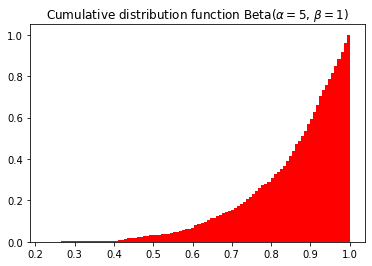

In [ ]:
#@title Answer - double click to see the code

plt.hist(np.random.beta(5,1,1000), 
         bins=100, 
         density=True, 
         cumulative=True, 
         color='r')
plt.title(r'Cumulative distribution function Beta($\alpha=5$, $\beta=1$)')
plt.show()


## **Task**

Sample $n=10000$ random vectors from multivariate normal distribution with mean 
\begin{bmatrix}
1\\
5
\end{bmatrix}

and covariance matrix
\begin{bmatrix}
1 & 0.7\\
0.7 & 1
\end{bmatrix}


* for sampling use **np.random.multivariate_normal()**,
* for plotting use **plt.scatter()** with *alpha* parameter,  

In [ ]:
# Insert your code here


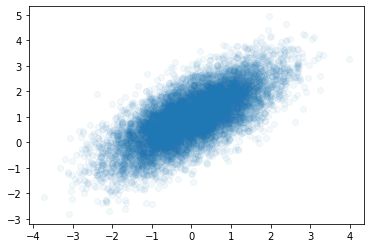

In [ ]:
#@title Answer - double click to see the code
mean = [1,5]
cov = [[1,.7],[.7,1]]

a = np.random.multivariate_normal(mean = [0,1],cov=cov,size=10000)

plt.scatter(a[:,0], a[:,1], alpha=0.05)
plt.show()

## **Task**

Using data from previous task plot the Milky Way.

* for plotting use **plt.hist2d()** with *bins* and *cmap* parameter,  

In [ ]:
# Insert your code here


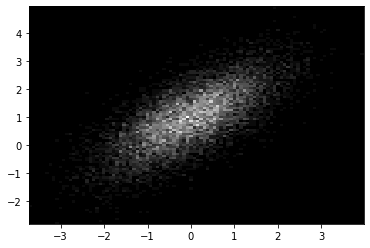

In [ ]:
#@title Answer - double click to see the code
plt.hist2d(a[:,0], a[:,1], bins=100, cmap='gray')
plt.show()

## **Task**

Use data from previous tasks.
For each vector compute its deciles $[0,1\dots,9]$ and plot the heatmap of quantity in each decile pair group: $[0,0], [0,1], \dots, [9,9]$.

* use **pandas** library and **pd.qcut()** to obtain deciles,
* for aggreagating data you can use **pd.pivot_table()** with properiate aggregation function - use **lambda** function,
* for plotting use **sns.heatmap()** from **seaborn** library.

In [ ]:
import seaborn as sns
import pandas as pd

# Insert your code here


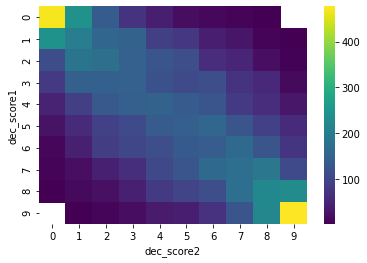

In [ ]:
#@title Answer - double click to see the code

import seaborn as sns
import pandas as pd


score1 = a[:,0]
score2 = a[:,1]

df = pd.DataFrame({'score1': score1,
                   'score2': score2
                  })

df['dec_score1'] = pd.qcut(score1, 10, labels=False)
df['dec_score2'] = pd.qcut(score2, 10, labels=False)


pivot = pd.pivot_table(df, 
               values='score1',
               index=['dec_score1'],
               columns=['dec_score2'],
               aggfunc=lambda x: len(x))

sns.heatmap(pivot, cmap='viridis')